In [1]:
import tensorflow as tf
import os
import numpy as np
import re
from PIL import Image
import matplotlib.pyplot as plt

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Instructions for updating:
Use tf.gfile.GFile.
image/u=2954580861,340785462&fm=26&gp=0.jpg


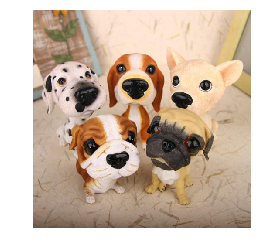

[2 0 1]
dog (score = 0.91219)
car (score = 0.06331)
plane (score = 0.02450)

image/u=4274795917,2943451696&fm=26&gp=0.jpg


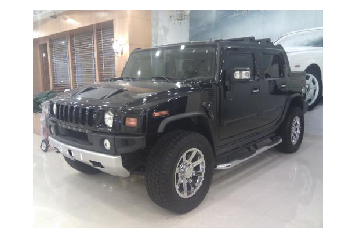

[0 2 1]
car (score = 0.88819)
dog (score = 0.09413)
plane (score = 0.01767)

image/u=1586901386,79193446&fm=26&gp=0.jpg


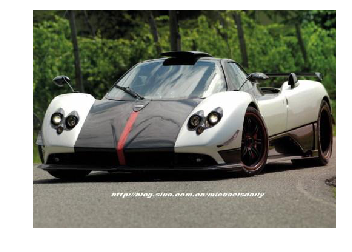

[0 2 1]
car (score = 0.91557)
dog (score = 0.06595)
plane (score = 0.01848)

image/u=741600432,257554972&fm=26&gp=0.jpg


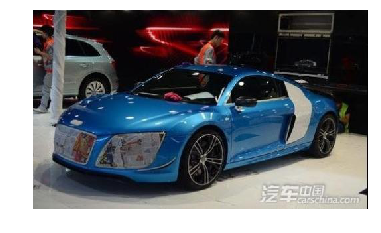

[0 2 1]
car (score = 0.95326)
dog (score = 0.03943)
plane (score = 0.00731)

image/u=1718839568,314926067&fm=200&gp=0.jpg


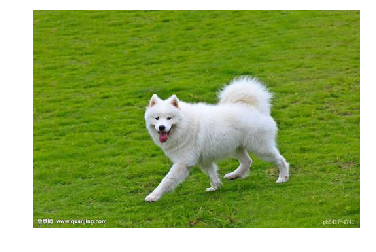

[2 0 1]
dog (score = 0.79313)
car (score = 0.13649)
plane (score = 0.07038)

image/u=383351707,211098694&fm=26&gp=0.jpg


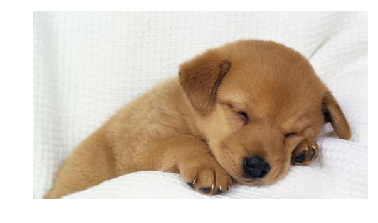

[2 0 1]
dog (score = 0.96242)
car (score = 0.02458)
plane (score = 0.01300)

image/u=1608055752,2210874855&fm=200&gp=0.jpg


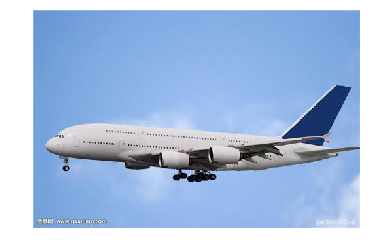

[1 2 0]
plane (score = 0.97795)
dog (score = 0.01495)
car (score = 0.00709)

image/u=307731208,2675356225&fm=200&gp=0.jpg


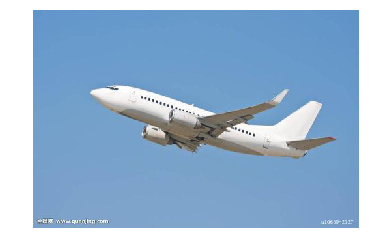

[1 2 0]
plane (score = 0.97701)
dog (score = 0.01587)
car (score = 0.00712)



In [2]:
lines = tf.gfile.GFile('model/output_labels.txt').readlines()
uid_to_human = {}
#一行一行读取数据
for uid,line in enumerate(lines) :
    #去掉换行符
    line=line.strip('\n')
    uid_to_human[uid] = line

def id_to_string(node_id):
    if node_id not in uid_to_human:
        return ''
    return uid_to_human[node_id]
def main():
    d

#创建一个图来存放google训练好的模型
with tf.gfile.FastGFile('model/output_graph.pb', 'rb') as f:
    graph_def = tf.GraphDef()
    graph_def.ParseFromString(f.read())
    tf.import_graph_def(graph_def, name='')


with tf.Session() as sess:
    softmax_tensor = sess.graph.get_tensor_by_name('final_result:0')
    #遍历目录
    for root,dirs,files in os.walk('image/'):
        for file in files:
            #载入图片
            image_data = tf.gfile.FastGFile(os.path.join(root,file), 'rb').read()
            predictions = sess.run(softmax_tensor,{'DecodeJpeg/contents:0': image_data})#图片格式是jpg格式
            predictions = np.squeeze(predictions)#把结果转为1维数据

            #打印图片路径及名称
            image_path = os.path.join(root,file)
            print(image_path)
            #显示图片
            img=Image.open(image_path)
            plt.imshow(img)
            plt.axis('off')
            plt.show()

            #排序
            top_k = predictions.argsort()[::-1]
            print(top_k)
            for node_id in top_k:     
                #获取分类名称
                human_string = id_to_string(node_id)
                #获取该分类的置信度
                score = predictions[node_id]
                print('%s (score = %.5f)' % (human_string, score))
            print()